In [1]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
my_path_training = '/neu/INFO6105/fruits/fruits-360/Training'
my_path_test = '/neu/INFO6105/fruits/readtest'
files= os.listdir(my_path_test)

In [2]:
img = np.array(Image.open(my_path_training + '/Apple Braeburn/1_100.jpg'))
print(img.ndim)
print(img.shape)
print(img.dtype)

3
(100, 100, 3)
uint8


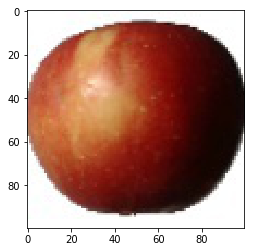

In [3]:
plt.figure   
plt.imshow(img, cmap=plt.cm.binary) 
plt.show()

In [4]:
    train_set = []
    test_set = []
    train_label = []
    test_label = []
    dirnames = os.listdir(my_path_training)
    print(dirnames)

['Apple Braeburn', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Dates', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mangostan', 'Maracuja', 'Melon Piel de Sapo', 'Mulberry', 'Nectarine', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Peach 2', 'Peach Flat', 'Pear', 'Pear Abate', 'Pear Kaiser', 'Pear Monster', 'Pear Williams', 'Pepino', 'Phy

In [5]:
def check_number(dir_name):
    str_list = dir_name.split()
    if str_list[-1].isdigit():
        temp = str_list[:-1]
    else:
        temp = str_list
    return " ".join(str(x) for x in temp)

In [6]:
def divide_file(file_dir):
    train_set = []
    test_set = []
    train_label = []
    test_label = []
    dirnames = os.listdir(file_dir)
    for dir_name in dirnames:
        print(file_dir + '/' + dir_name)
        for files in os.walk(file_dir + '/' + dir_name):
            for imgjpg1 in files[2][:-100]:
                img1 = np.array(Image.open(files[0] + '/' + imgjpg1))
                train_set.append(img1)
                train_label.append(check_number(dir_name))
              
            for imgjpg2 in files[2][-100:]:
                img2 = np.array(Image.open(files[0] + '/' + imgjpg2))
                test_set.append(img2)
                test_label.append(check_number(dir_name))
                
    return (np.asarray(train_set), np.asarray(test_set), np.asarray(train_label), np.asarray(test_label))

In [7]:
train_set, test_set, train_label, test_label = divide_file(my_path_training)

/neu/INFO6105/fruits/fruits-360/Training/Apple Braeburn
/neu/INFO6105/fruits/fruits-360/Training/Apple Golden 1
/neu/INFO6105/fruits/fruits-360/Training/Apple Golden 2
/neu/INFO6105/fruits/fruits-360/Training/Apple Golden 3
/neu/INFO6105/fruits/fruits-360/Training/Apple Granny Smith
/neu/INFO6105/fruits/fruits-360/Training/Apple Red 1
/neu/INFO6105/fruits/fruits-360/Training/Apple Red 2
/neu/INFO6105/fruits/fruits-360/Training/Apple Red 3
/neu/INFO6105/fruits/fruits-360/Training/Apple Red Delicious
/neu/INFO6105/fruits/fruits-360/Training/Apple Red Yellow 1
/neu/INFO6105/fruits/fruits-360/Training/Apple Red Yellow 2
/neu/INFO6105/fruits/fruits-360/Training/Apricot
/neu/INFO6105/fruits/fruits-360/Training/Avocado
/neu/INFO6105/fruits/fruits-360/Training/Avocado ripe
/neu/INFO6105/fruits/fruits-360/Training/Banana
/neu/INFO6105/fruits/fruits-360/Training/Banana Lady Finger
/neu/INFO6105/fruits/fruits-360/Training/Banana Red
/neu/INFO6105/fruits/fruits-360/Training/Cactus fruit
/neu/INFO6

In [8]:
print(train_set.shape)
print(train_label.shape)

(39405, 100, 100, 3)
(39405,)


In [9]:
'''convert the category to int'''
import collections
def convert_category(file_dir):
    num_cat = collections.defaultdict()
    cat_num = collections.defaultdict()
    start = 0
    for dirpath, dirnames, filenames in os.walk(file_dir):
        for dir_name in dirnames:
            dir_name = check_number(dir_name)  
            if dir_name not in num_cat:
                start += 1
                num_cat[dir_name] = start
                cat_num[start] = dir_name
    return (num_cat, cat_num)

In [10]:
num_cat, cat_num = convert_category(my_path_training)

In [11]:
print(num_cat)

defaultdict(None, {'Apple Braeburn': 1, 'Apple Golden': 2, 'Apple Granny Smith': 3, 'Apple Red': 4, 'Apple Red Delicious': 5, 'Apple Red Yellow': 6, 'Apricot': 7, 'Avocado': 8, 'Avocado ripe': 9, 'Banana': 10, 'Banana Lady Finger': 11, 'Banana Red': 12, 'Cactus fruit': 13, 'Cantaloupe': 14, 'Carambula': 15, 'Cherry': 16, 'Cherry Rainier': 17, 'Cherry Wax Black': 18, 'Cherry Wax Red': 19, 'Cherry Wax Yellow': 20, 'Chestnut': 21, 'Clementine': 22, 'Cocos': 23, 'Dates': 24, 'Granadilla': 25, 'Grape Blue': 26, 'Grape Pink': 27, 'Grape White': 28, 'Grapefruit Pink': 29, 'Grapefruit White': 30, 'Guava': 31, 'Hazelnut': 32, 'Huckleberry': 33, 'Kaki': 34, 'Kiwi': 35, 'Kumquats': 36, 'Lemon': 37, 'Lemon Meyer': 38, 'Limes': 39, 'Lychee': 40, 'Mandarine': 41, 'Mango': 42, 'Mangostan': 43, 'Maracuja': 44, 'Melon Piel de Sapo': 45, 'Mulberry': 46, 'Nectarine': 47, 'Orange': 48, 'Papaya': 49, 'Passion Fruit': 50, 'Peach': 51, 'Peach Flat': 52, 'Pear': 53, 'Pear Abate': 54, 'Pear Kaiser': 55, 'Pear 

In [12]:
def create_array(labels, numdict):
    ans = []
    all_num = 0
    for items in labels:
        if numdict[items] not in ans:
            all_num += 1
        ans.append(numdict[items])
    ans
    return (np.asarray(ans), all_num)

In [13]:
train_labels, all_num = create_array(train_label, num_cat)
test_labels, all_num = create_array(test_label, num_cat)

In [14]:
print(train_labels)
print(len(train_labels))
print(len(test_labels))

[ 1  1  1 ... 79 79 79]
39405
9500


In [15]:
train_labels

array([ 1,  1,  1, ..., 79, 79, 79])

In [16]:
def convert_list_label(label, num):
    l1 = []
    for i in range(len(label)):
        l2 = []
        for j in range(1, num + 1):
            if j == label[i]:
                l2.append(1)
            else:
                l2.append(0)
        l1.append(l2)
    return np.asarray(l1)

In [17]:
from keras.utils import to_categorical 

Using TensorFlow backend.


In [18]:
train_set = train_set / 255.0
test_set = test_set / 255.0

In [19]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), input_shape = (100, 100, 3), activation = "relu"))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Conv2D(64, (3, 3), activation = "relu", padding = "same"))
model.add(keras.layers.MaxPooling2D(pool_size = (3, 3)))

model.add(keras.layers.Conv2D(128, (3, 3), activation = "relu", padding = "same"))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Conv2D(128, (3, 3), activation = "relu", padding = "same"))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(128, activation = "relu"))
model.add(keras.layers.Dense(80, activation = "softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 49, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         147584    
__________

In [21]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
history = model.fit(train_set, train_labels, batch_size = 128, epochs = 20, validation_data = (test_set, test_labels))

Train on 39405 samples, validate on 9500 samples
Epoch 1/20
39405/39405 [==============================] - 440s 11ms/sample - loss: 1.3850 - acc: 0.6409 - val_loss: 0.5604 - val_acc: 0.8685
Epoch 2/20
39405/39405 [==============================] - 435s 11ms/sample - loss: 0.2111 - acc: 0.9488 - val_loss: 0.2763 - val_acc: 0.9317
Epoch 3/20
39405/39405 [==============================] - 436s 11ms/sample - loss: 0.1027 - acc: 0.9789 - val_loss: 0.1945 - val_acc: 0.9568
Epoch 4/20
39405/39405 [==============================] - 432s 11ms/sample - loss: 0.0852 - acc: 0.9825 - val_loss: 0.2115 - val_acc: 0.9591
Epoch 5/20
39405/39405 [==============================] - 432s 11ms/sample - loss: 0.0510 - acc: 0.9901 - val_loss: 0.2404 - val_acc: 0.9457
Epoch 6/20
39405/39405 [==============================] - 432s 11ms/sample - loss: 0.0513 - acc: 0.9902 - val_loss: 0.2626 - val_acc: 0.9529
Epoch 7/20
39405/39405 [==============================] - 432s 11ms/sample - loss: 0.0556 - acc: 0.9912 -

In [23]:
from keras.models import load_model
model.save('my_model.h5')
del model

In [24]:
model = keras.models.load_model('my_model.h5')

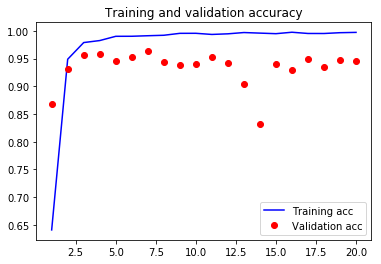

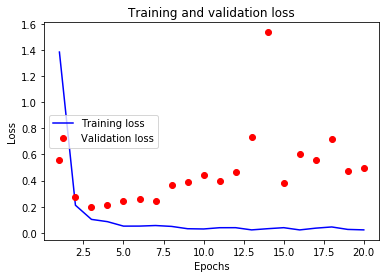

In [25]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'b', label = 'Training acc')
plt.plot(epochs, val_acc, 'ro', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'ro', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()